# 오존량 예측

In [1]:
import pandas as pd

# csv 파일을 로딩
df = pd.read_csv("c:/workspace3/data/ozone2.csv")

df.head()

,Month,Day,Solar.R,Wind,Temp,Ozone,Result
0,5,21,8.0,9.7,59,1,0
1,5,23,25.0,9.7,61,4,0
2,5,18,78.0,18.4,57,6,0
3,7,15,48.0,14.3,80,7,0
4,9,24,49.0,10.3,69,7,0


In [2]:
cols=['Solar.R', 'Wind', 'Temp']

X = df[cols]
y = df['Result']

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,random_state=10)

c:\Python3.9.13\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python3.9.13\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python3.9.13\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python3.9.13\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the

Text(0.5, 0, 'number of clusters')

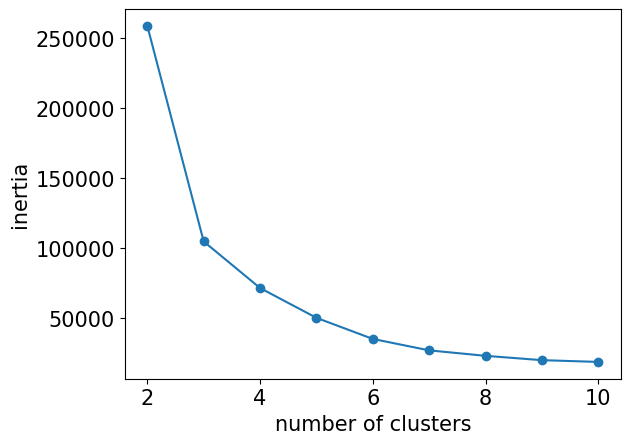

In [4]:
#최적의 클러스터 갯수를 구하는 방법
#inertia value : 군집화가 된 후 각 중심점에서 군집의 데이터간의 거리를 합산한 값
#작을수록 응집도가 높은 군집

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

clusters = range(2, 11)

inertias = []

for n in clusters:
    # 모델 생성
    model = KMeans(n_clusters=n,random_state=10)
    model.fit(X_train)
    inertias.append(model.inertia_)

plt.rcParams["font.size"]=15

plt.plot(clusters, inertias, "-o")
plt.ylabel("inertia")
plt.xlabel("number of clusters")

#엘보우(elbow) 기법
#inertias 값이 하강하다가 팔꿈치처럼 꺾이는 부분 3
#따라서 3개의 클러스터로 분류하는 것이 적절함

In [5]:
#클러스터 갯수를 3으로 설정

model = KMeans(n_clusters=3,random_state=10)
print(model)

pred=model.fit_predict(X_train)           # <=  model.fit()
print(pred[:5])                           #     model.predict()

pred=model.predict(X_test)
print(pred[:5])

KMeans(n_clusters=3, random_state=10)
[2 0 1 0 2]
[1 1 2 1 0]


c:\Python3.9.13\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [6]:
#군집화에서는 개별 라벨값보다는 군집이 중요함
#실루엣 값은 한 클러스터 안의 데이터들이 다른 클러스터와 비교해서 얼마나 비슷한가를 나타냄
# ai : i와 같은 군집에 속한 원소들의 평균 거리
# bi : i와 다른 군집 중 가장 가까운 군집까지의 평균 거리
# (bi - ai) / max(ai,bi)
# 실루엣계수가 클수록 좋은 모형
# 군집의 형상이 복잡하거나 크기의 차이가 많이 나면 비교가 어려운 단점이 있음

from sklearn.metrics import silhouette_score

silhouette_score(X_test, pred)

0.362807087165505

In [7]:
#클러스터 갯수를 2로 설정

model = KMeans(n_clusters=2,random_state=10)
print(model)

pred=model.fit_predict(X_train)
print(pred[:5])

pred=model.predict(X_test)
print(pred[:5])

KMeans(n_clusters=2, random_state=10)
[1 0 1 0 0]
[1 1 1 1 0]


c:\Python3.9.13\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [8]:
silhouette_score(X_test, pred)

0.6828285281281741

c:\Python3.9.13\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python3.9.13\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python3.9.13\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python3.9.13\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the

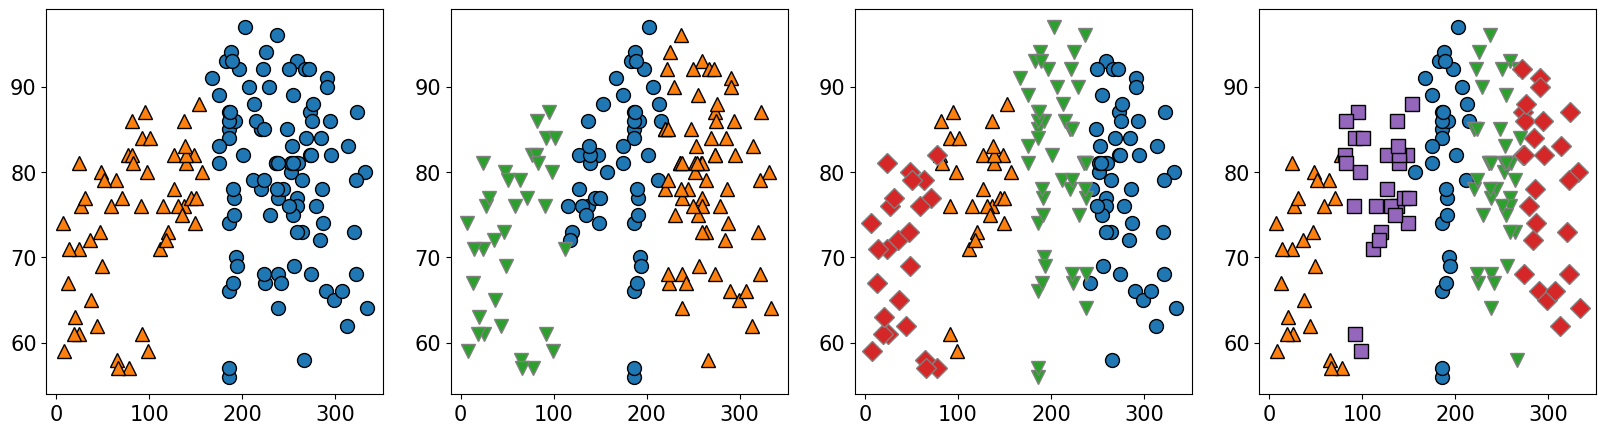

In [9]:
from matplotlib import pyplot as plt
import mglearn

#같은 데이터라도 k값을 어떻게 할당하느냐에 따라 클러스터링 결과가 달라질 수 있음
#1행 4열의 서브플롯 생성
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# 2,3,4,5개의 클러스터로 나눌 경우
idx=0
for k in [2,3,4,5]:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    lbls = kmeans.labels_
    mglearn.discrete_scatter(X["Solar.R"], X["Temp"], lbls, ax=axes[idx])
    idx+=1